In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
3,261 cases (7 day average) as of Wed 02 Jun, +257.3 since Tue 01 Jun
91 hospitalised (7 day average) as of Wed 02 Jun, +0.0 since Wed 02 Jun
5 died (7 day average) as of Wed 02 Jun, -0.7 since Tue 01 Jun


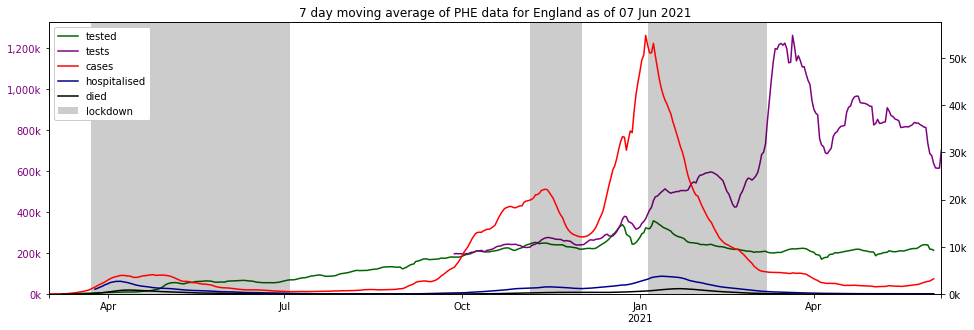

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

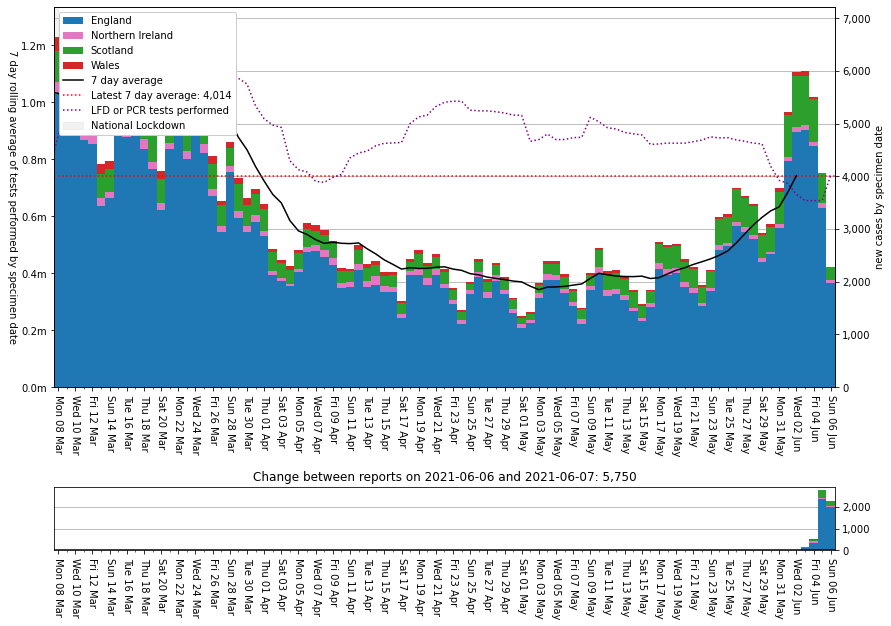

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

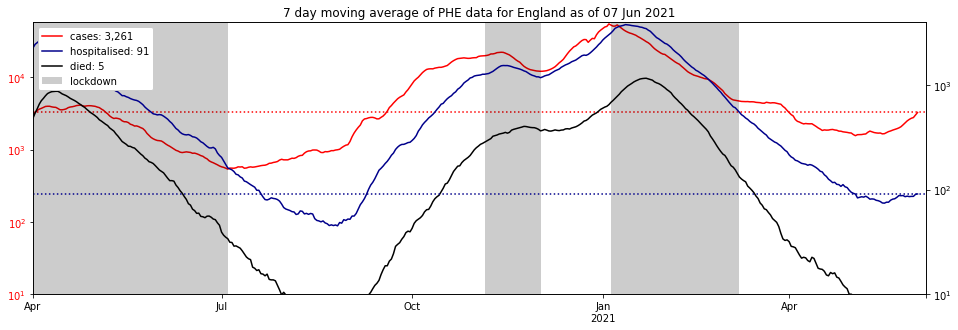

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

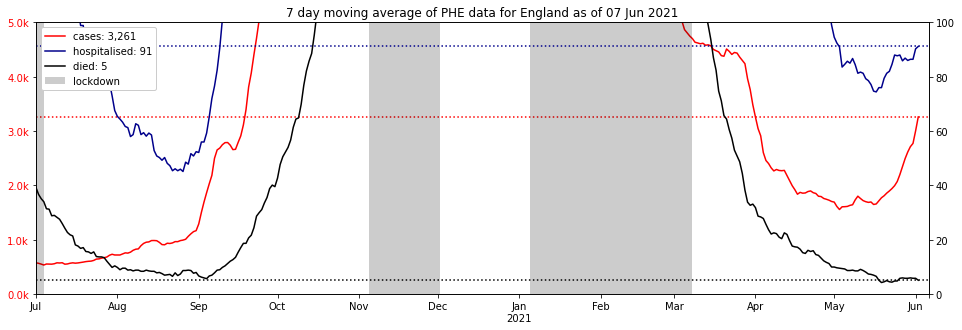

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=5_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=100)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,06 Jun 21,"+23,710,646","+33,800,107","+23,710,646","+217,491","+99,621","+217,491"
Northern Ireland,06 Jun 21,"+710,121","+1,090,693","+710,121","+6,539","+3,557","+6,539"
Scotland,06 Jun 21,"+2,251,259","+3,386,321","+2,251,259","+23,766","+20,542","+23,766"
Wales,06 Jun 21,"+1,249,268","+2,183,455","+1,249,268","+12,145","+3,625","+12,145"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,23710646.0,33800107.0,10089461.0,56286961,42.124580,17.925041,39.950379
1,Northern Ireland,N92000002,710121.0,1090693.0,380572.0,1893667,37.499782,20.097092,42.403126
2,Scotland,S92000003,2251259.0,3386321.0,1135062.0,5463300,41.206945,20.776124,38.016931
3,Wales,W92000004,1249268.0,2183455.0,934187.0,3152879,39.623087,29.629650,30.747263


'partial: 40,460,576 (60.6%), full: 27,921,294'

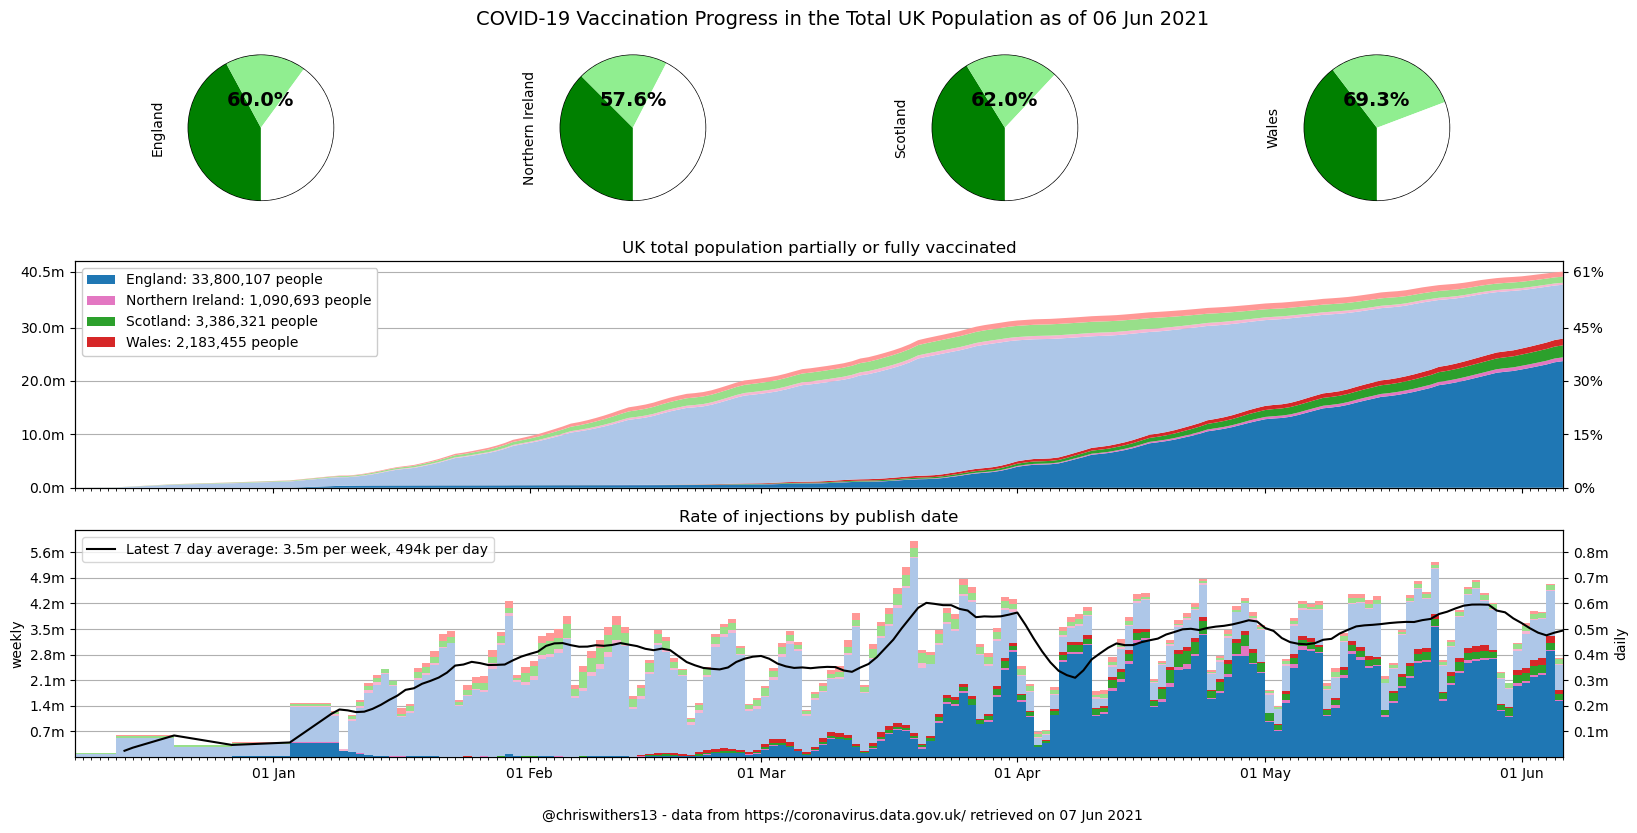

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

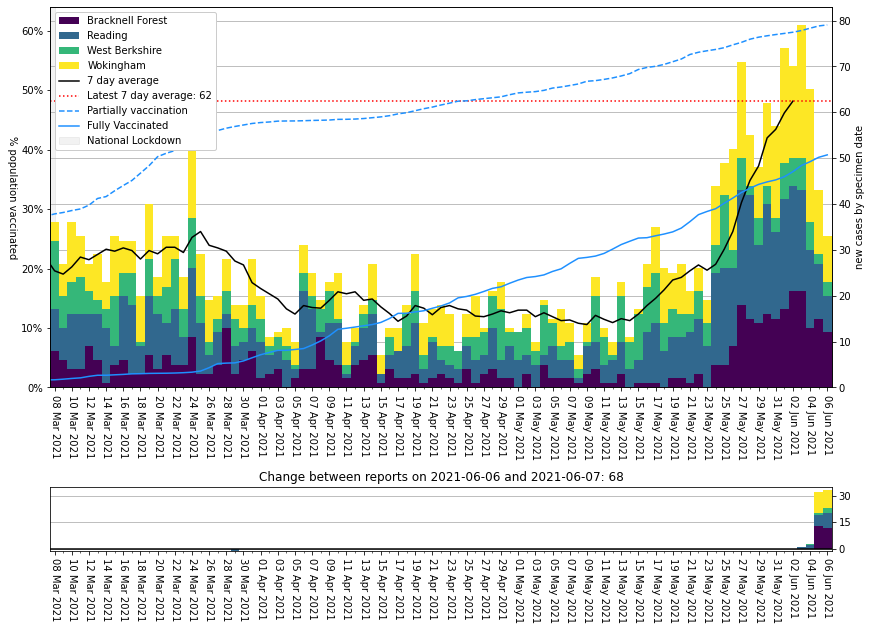

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1],  lines=population_vaccinated)

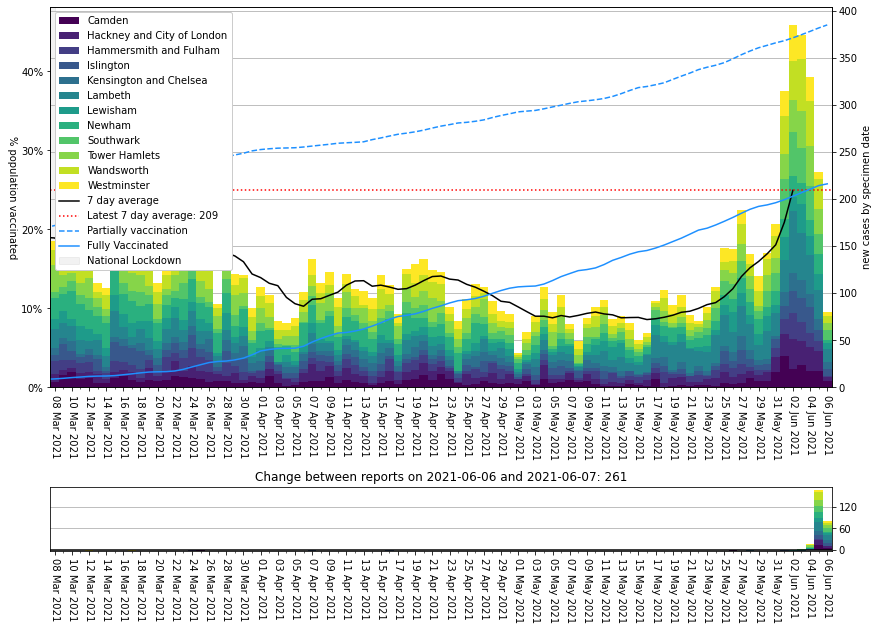

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E06000008,Blackburn with Darwen,550.448910,824.0,2021-06-06
E07000125,Rossendale,296.578160,212.0,2021-06-06
E07000120,Hyndburn,286.267784,232.0,2021-06-06
E08000001,Bolton,277.864719,799.0,2021-06-06
E07000117,Burnley,274.403959,244.0,2021-06-06
E07000124,Ribble Valley,274.274077,167.0,2021-06-06
E07000126,South Ribble,271.690075,301.0,2021-06-06
E08000006,Salford,229.490716,594.0,2021-06-06
E08000003,Manchester,211.446701,1169.0,2021-06-06


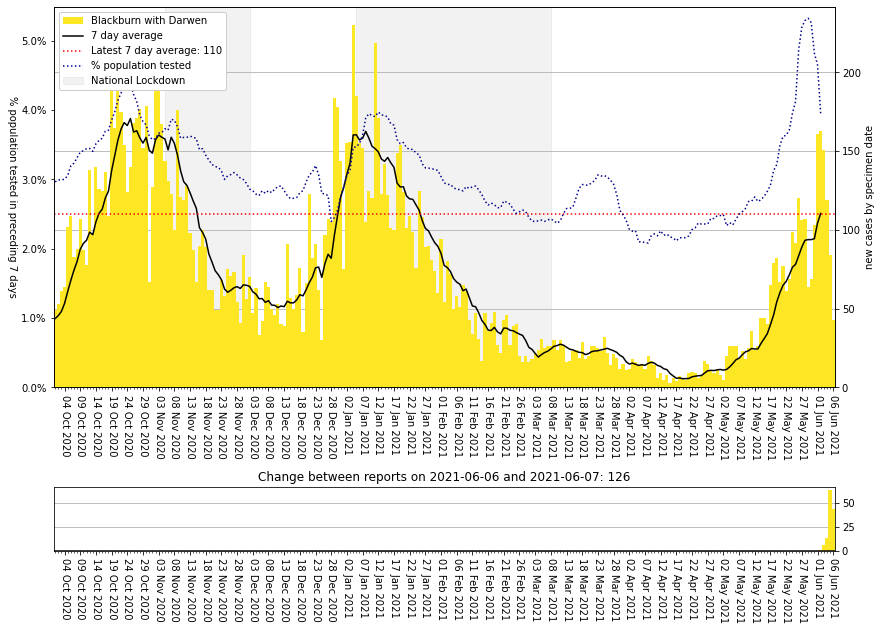

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000003,Manchester,211.446701,1169.0,2021-06-06
S12000049,Glasgow City,145.312105,920.0,2021-06-06
S12000036,City of Edinburgh,164.593374,864.0,2021-06-06
E06000008,Blackburn with Darwen,550.448910,824.0,2021-06-06
E08000001,Bolton,277.864719,799.0,2021-06-06
E08000025,Birmingham,62.181647,710.0,2021-06-06
E08000035,Leeds,78.422572,622.0,2021-06-06
E08000006,Salford,229.490716,594.0,2021-06-06
E08000007,Stockport,186.420287,547.0,2021-06-06


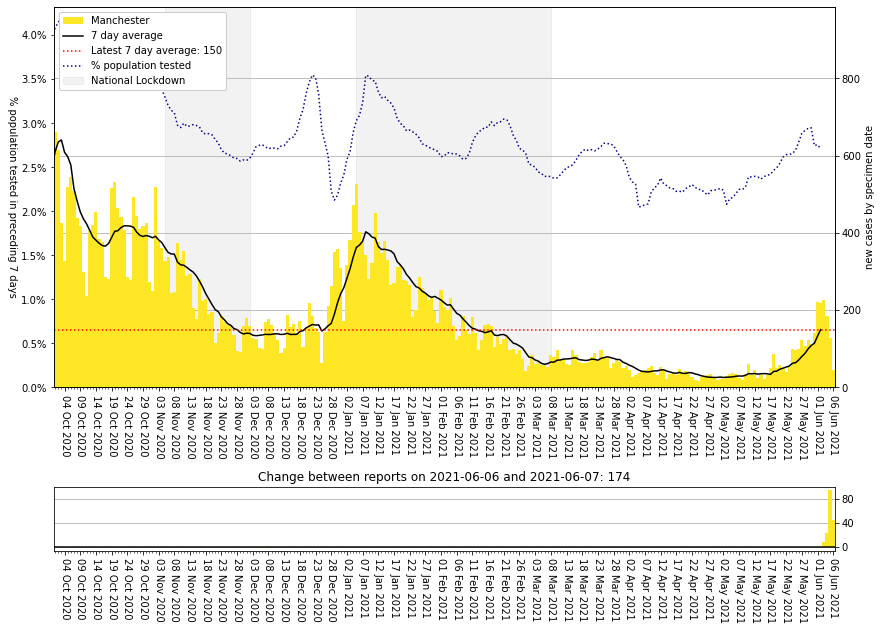

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.4

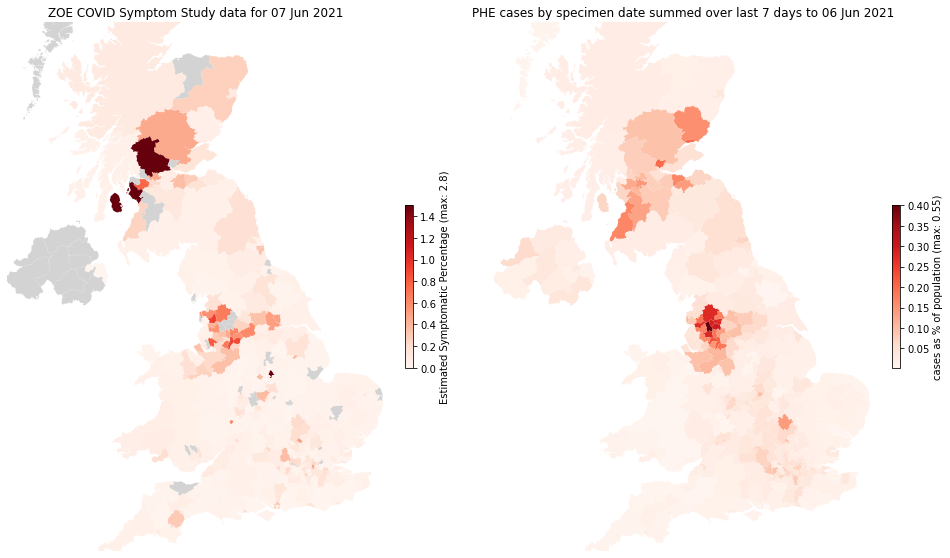

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...